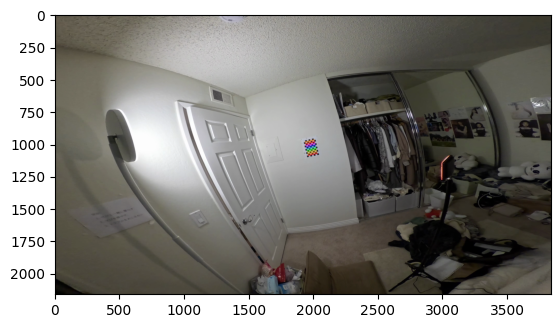

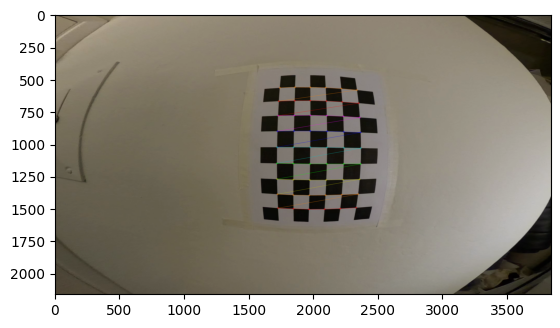

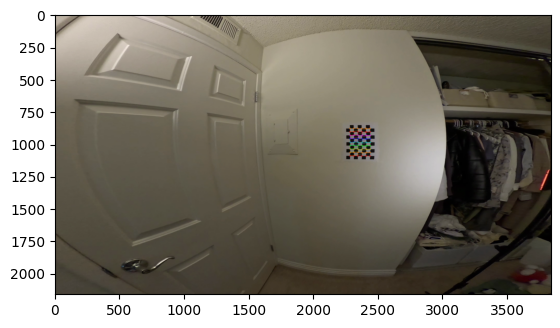

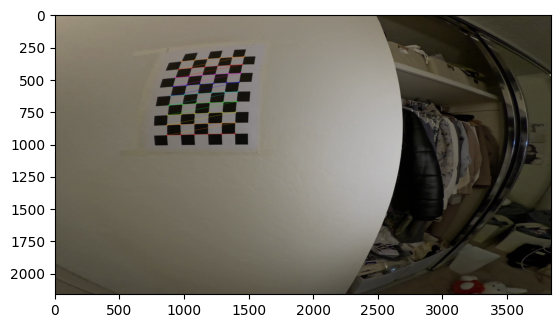

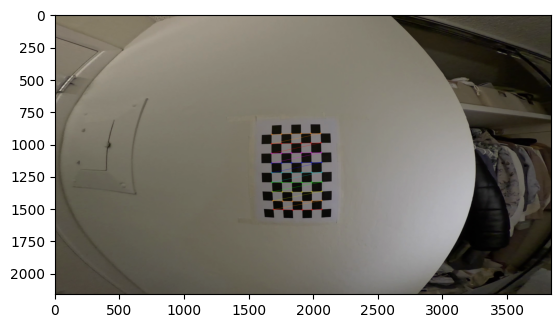

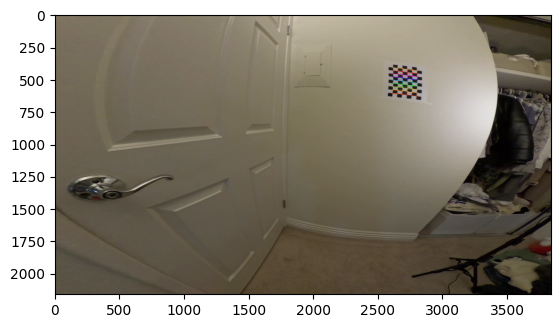

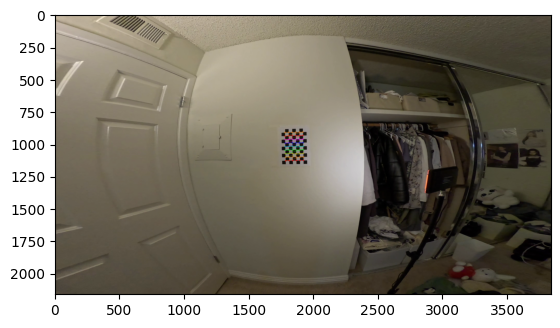

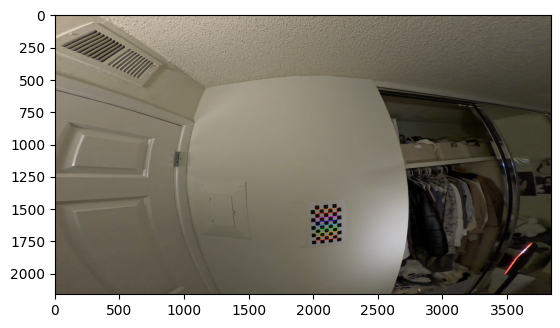

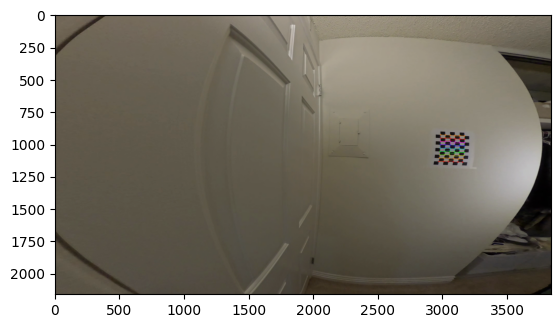

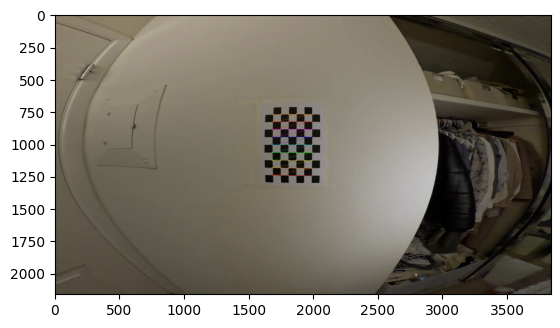

chessboard not found in new_calib_imgs_square/calib_453.png
chessboard not found in new_calib_imgs_square/calib_450.png
Camera matrix:
[[5.42408979e+03 0.00000000e+00 1.89420613e+03]
 [0.00000000e+00 4.09614488e+03 1.05320755e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distort:
[[-2.52603708e+00  1.10404484e+01 -1.34105892e-02 -5.25242209e-03
  -1.40729294e+01]]
Rotate vector:
(array([[1.01615894],
       [0.09470568],
       [2.75346243]]), array([[ 0.94775075],
       [-0.01042166],
       [-2.9846675 ]]), array([[-0.76947167],
       [ 0.02797317],
       [-3.04234925]]), array([[0.09949332],
       [0.55142248],
       [3.09499645]]), array([[1.04002787],
       [0.05637398],
       [2.93497764]]), array([[-0.20386574],
       [-0.56693456],
       [-2.95971852]]), array([[1.05401433],
       [0.0104871 ],
       [2.93880851]]), array([[-1.00729538],
       [ 0.10148373],
       [ 2.94836615]]), array([[-0.31908505],
       [-1.02088696],
       [-2.81707336]]), array([[-

In [7]:
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt

CHECKERBOARD = (6,9)

subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW

objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

_img_shape = None
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('new_calib_imgs_square/*.png')
count = 0

for fname in images:
    img = cv2.imread(fname)
    if _img_shape == None:
        _img_shape = img.shape[:2]
    else:
        assert _img_shape == img.shape[:2], "All images must share the same size."
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
    if ret:
        objpoints.append(objp)
        cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
        imgpoints.append(corners)
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners, ret)
        fname_without_ext = os.path.splitext(os.path.basename(fname))[0]
        cv2.imwrite("corner_original/" + fname_without_ext + ".png",img)
        if count < 10:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.show()
        count += 1
    else:
        print(f"chessboard not found in {fname}")

if len(objpoints) > 0 and len(imgpoints) > 0:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    print("Camera matrix:")
    print(mtx)
    print("Distort:")
    print(dist)
    print("Rotate vector:")
    print(rvecs)
    print("Translation vector:")
    print(tvecs)

In [8]:
def undistort_remap(img_path, num):
    img = cv2.imread(img_path)
    h,w = img.shape[:2]
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    # undistort
    mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None, newcameramtx, (w,h),5)
    dst = cv2.remap(img,mapx,mapy,cv2.INTER_LANCZOS4)

    #crop
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    fname_without_ext = os.path.splitext(os.path.basename(img_path))[0]
    cv2.imwrite("undistorted_original_remap/" + fname_without_ext + ".png",dst)
    if num < 10:
        print(fname_without_ext + " before")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        print(fname_without_ext + " after")
        plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
        plt.show()

In [9]:
def undistort_undisort(img_path, num):
    img = cv2.imread(img_path)
    h,w = img.shape[:2]
    newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
    # undistort
    mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
    dst = cv2.remap(img,mapx,mapy,cv2.INTER_LANCZOS4)

    #crop
    x,y,w,h = roi
    dst = dst[y:y+h, x:x+w]
    fname_without_ext = os.path.splitext(os.path.basename(img_path))[0]
    cv2.imwrite("undistorted_original_undistort/" + fname_without_ext + ".png",dst)
    if num < 10:
        print(fname_without_ext + " before")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        print(fname_without_ext + " after")
        plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
        plt.show()

calib_15 before


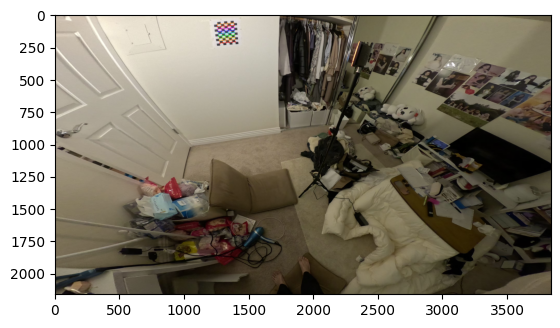

calib_15 after


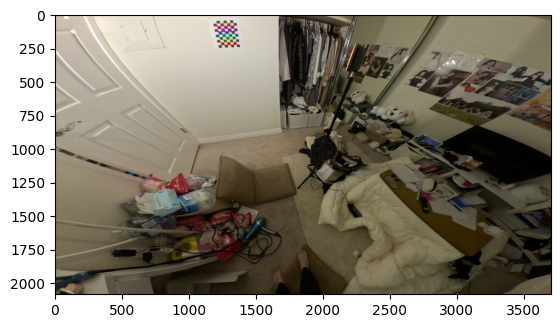

calib_29 before


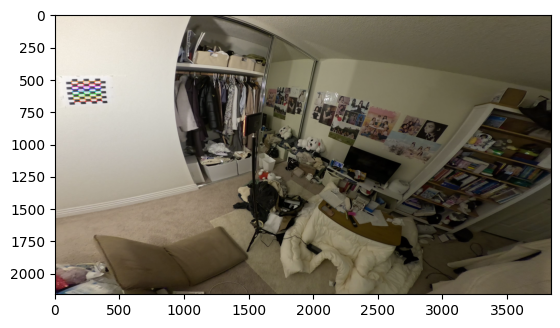

calib_29 after


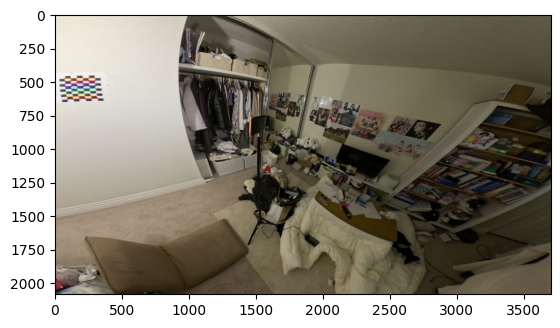

calib_1 before


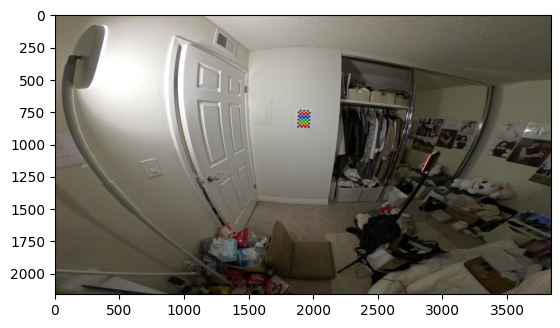

calib_1 after


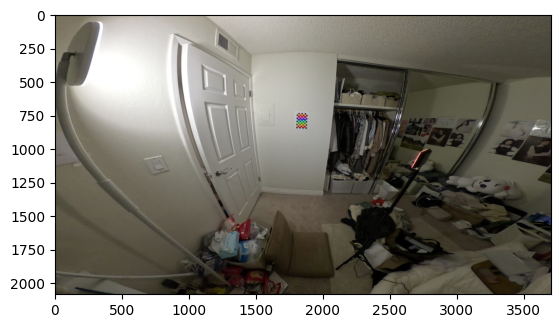

calib_105 before


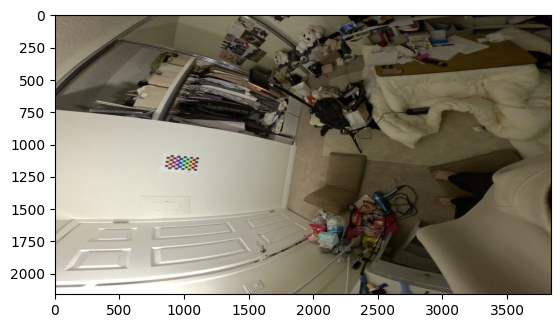

calib_105 after


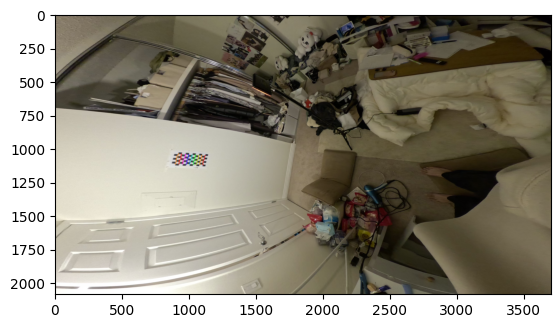

calib_111 before


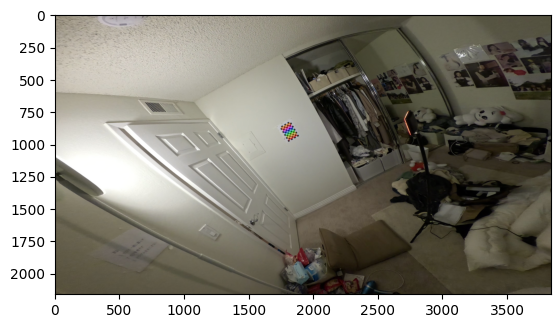

calib_111 after


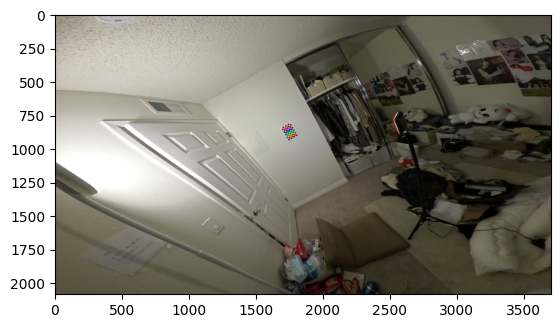

calib_110 before


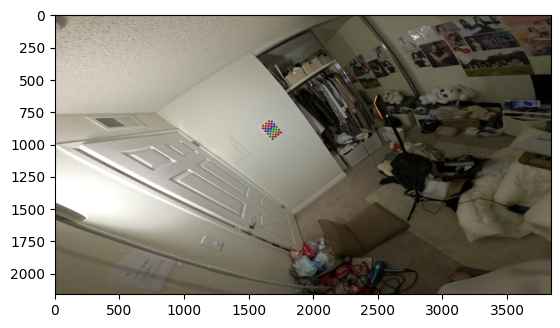

calib_110 after


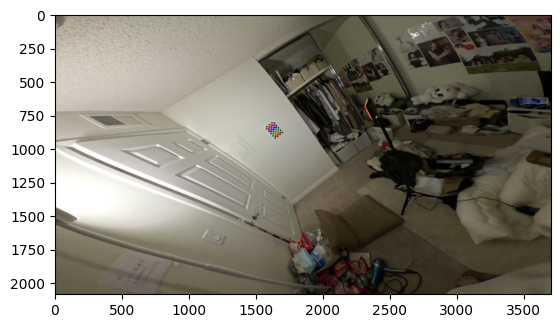

calib_104 before


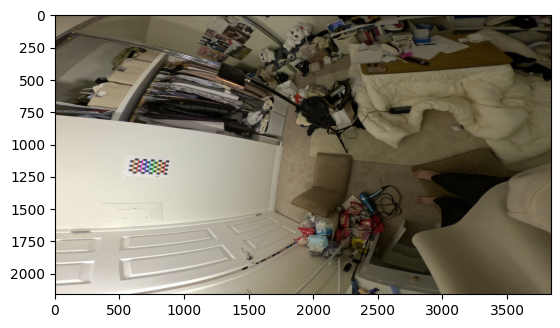

calib_104 after


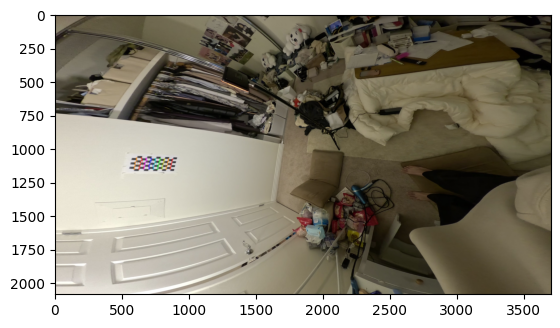

calib_0 before


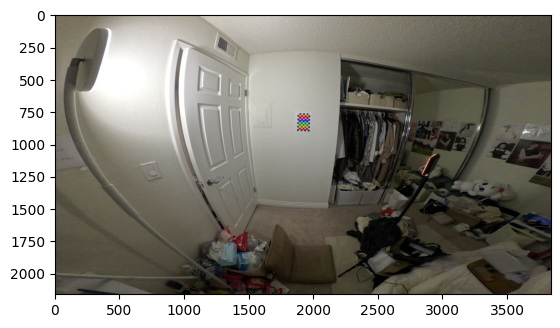

calib_0 after


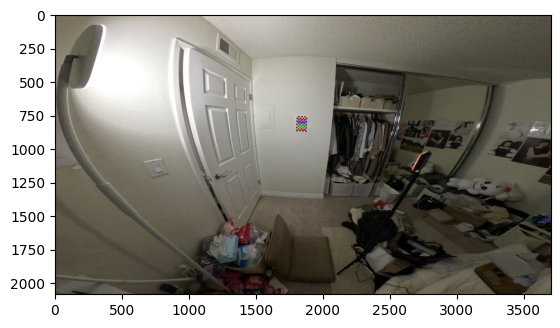

calib_28 before


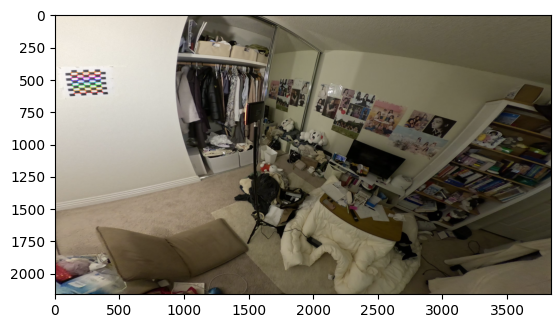

calib_28 after


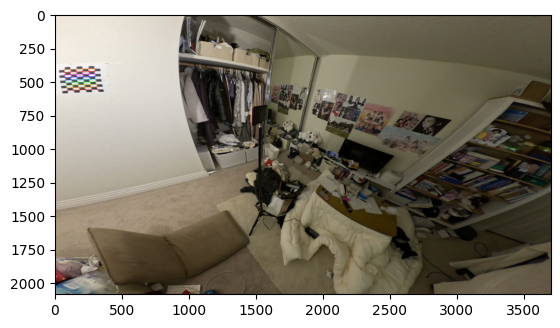

calib_14 before


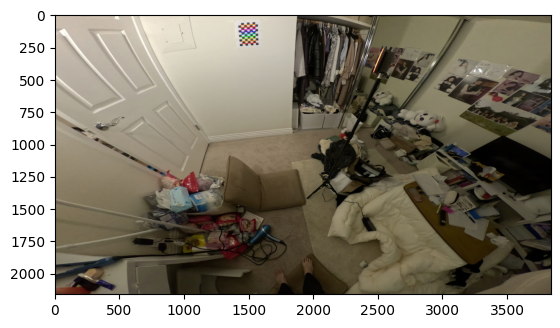

calib_14 after


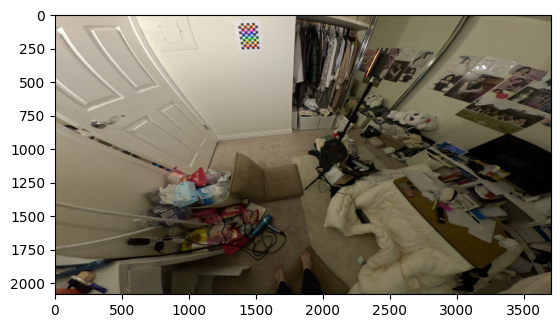

In [10]:
corner_images = glob.glob('corner_fisheye/*.png')
for ind, fname in enumerate(corner_images):
    undistort_remap(fname, ind)

In [5]:
def print_reprojection_error():
    mean_error = 0
    for i in range(len(objpoints)):
        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
        #print(imgpoints2.shape)
        #print(imgpoints[i].shape)
        imgpoints2 = imgpoints2.reshape(54, 1, 2)
        #print(imgpoints2.shape)
        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
        mean_error += error
    print("reprojection error: {}".format(mean_error/len(objpoints)))

In [6]:
print_reprojection_error()

reprojection error: 0.15584035198447788
